<a href="https://colab.research.google.com/github/Madhu-Mitra/MLPC/blob/main/Task_2_Data_Exploration_Report_Queby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
dfeat = pd.read_csv("/content/task_2_features_1d8b658c21ddc127_e330cbf_generic.csv")
dfeat.head()

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.8,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.6,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.6,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.4,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.6,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731


In [3]:
df = pd.read_csv("/content/task_2_annotations_82d1d6d1093eaab6_e330cbf_generic.csv")
df.head()

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,gems_power,gems_joyful_activation,gems_tension,gems_sadness,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering
0,1,0,91,1,-1,2,1,2,4,2.0,1,1,1,2,3,2,1,1.0,2
1,1,0,19,2,-1,3,3,3,4,4.0,1,2,3,3,3,2,2,3.0,3
2,1,0,189,2,0,2,1,2,1,4.0,2,2,1,1,3,2,1,1.0,4
3,1,0,126,2,2,4,5,2,3,5.0,2,4,1,3,5,1,2,2.0,5
4,1,0,26,4,2,3,5,2,3,3.0,1,3,4,1,4,1,2,3.0,1


# 2. Derive discrete quadrant-based class labels from the raw arousal/valence annotations.

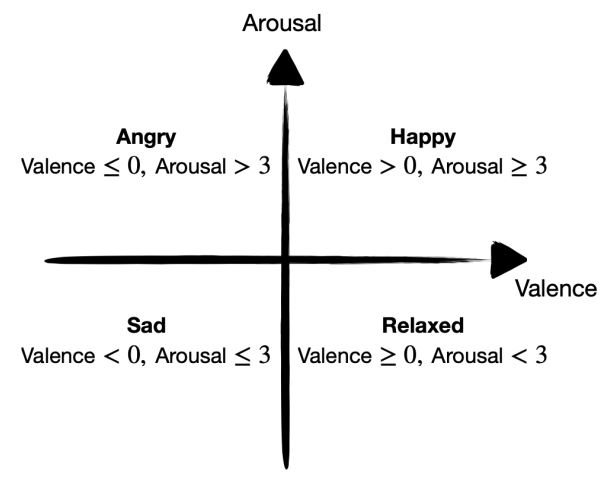

What if `valence = 0` and `arousal = 3`? Is the label `Angry`, `Happy`, `Sad`, or `Relaxed`?

## Combine pianist_id and segment_id to create 1 label

In [4]:
# aggregate annotations into 297 labels
agg_ann = df[["pianist_id", "segment_id"]].value_counts().index
agg_ann

MultiIndex([( 1,  0),
            (10, 13),
            (10,  9),
            (10,  7),
            (10,  5),
            (10,  3),
            (10,  1),
            ( 3, 26),
            ( 3, 24),
            ( 3, 22),
            ...
            (11, 19),
            (11, 13),
            (11, 17),
            (11, 15),
            (11,  1),
            (11, 11),
            (11,  9),
            (11,  7),
            (11,  3),
            (11,  5)],
           names=['pianist_id', 'segment_id'], length=297)

In [5]:
ann = 0
df["agg_ann"] = ""

for i in agg_ann:
    ann += 1
    df["agg_ann"].loc[(df["pianist_id"] == i[0]) & (df["segment_id"] == i[1])] = ann

df[["agg_ann", "pianist_id", "segment_id"]]

,agg_ann,pianist_id,segment_id
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
2633,42,11,26
2634,42,11,26
2635,42,11,26
2636,42,11,26


In [6]:
df["agg_ann"].value_counts()

1      11
2      11
3      11
4      11
5      11
       ..
293     6
294     6
295     6
296     6
297     6
Name: agg_ann, Length: 297, dtype: int64

Now we have 297 labels for each 11 `pianist_id` x 27 `segments_id` combination

In [7]:
for i in range(1, 5):

    df[f"quadrant_{i}"] = ""

    df[f"quadrant_{i}"].loc[(df["valence"] <= 0) & (df["arousal"] > 3)] = "angry"
    df[f"quadrant_{i}"].loc[(df["valence"] > 0) & (df["arousal"] >= 3)] = "happy"
    df[f"quadrant_{i}"].loc[(df["valence"] < 0) & (df["arousal"] <= 3)] = "sad"
    df[f"quadrant_{i}"].loc[(df["valence"] >= 0) & (df["arousal"] < 3)] = "relaxed"

In [8]:
df["quadrant_1"].value_counts()

relaxed    692
happy      635
sad        604
angry      516
           191
Name: quadrant_1, dtype: int64

In [9]:
df["agg_ann"].loc[df["quadrant_1"] == ""].value_counts()

4      5
179    3
16     3
138    3
83     3
      ..
101    1
119    1
102    1
280    1
42     1
Name: agg_ann, Length: 150, dtype: int64

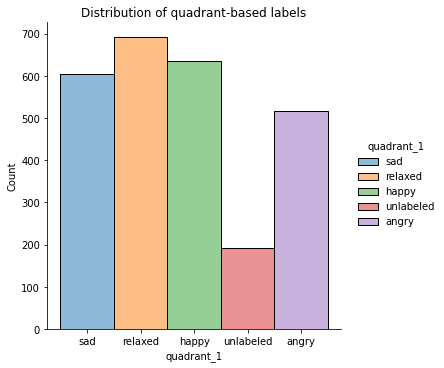

In [10]:
df["quadrant_1"].loc[df["quadrant_1"] == ""] = "unlabeled"
sns.displot(df, x="quadrant_1", kde=True, hue="quadrant_1", kind="hist").set(title='Distribution of quadrant-based labels')

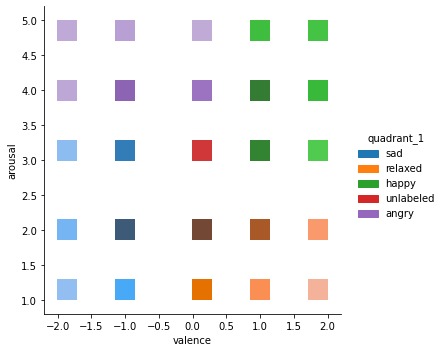

In [12]:
sns.displot(data=df, x="valence", y="arousal", hue="quadrant_1", kind="hist")

In [13]:
df.loc[df["quadrant_1"] == "unlabeled"]

,pianist_id,segment_id,annotator_id,arousal,valence,gems_wonder,gems_transcendence,gems_tenderness,gems_nostalgia,gems_peacefulness,...,gemmes_flow,gemmes_movement,gemmes_force,gemmes_interior,gemmes_wandering,agg_ann,quadrant_1,quadrant_2,quadrant_3,quadrant_4
6,1,0,161,3,0,5,3,3,4,2.0,...,4,2,2,3.0,3,1,unlabeled,,,
19,1,2,91,3,0,1,1,2,1,1.0,...,1,5,2,1.0,1,55,unlabeled,,,
24,1,2,8,3,0,4,4,2,2,2.0,...,4,2,3,4.0,2,55,unlabeled,,,
41,1,4,126,3,0,3,2,3,2,2.0,...,2,1,2,1.0,2,54,unlabeled,,,
42,1,4,26,3,0,2,2,1,1,3.0,...,2,2,3,3.0,2,54,unlabeled,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,11,16,169,3,0,3,2,4,4,5.0,...,3,3,2,2.0,1,28,unlabeled,,,
2553,11,17,72,3,0,2,2,1,1,1.0,...,1,4,3,3.0,2,290,unlabeled,,,
2559,11,18,188,3,0,4,3,2,4,2.0,...,2,4,2,1.0,3,27,unlabeled,,,
2587,11,21,72,3,0,3,1,2,2,4.0,...,2,2,2,2.0,2,286,unlabeled,,,


*   191 cells with `valence = 0` and `arousal = 3` are unlabeled
*   `agg_ann = 4` has the most number of empty labels


Now let's try assigning it to `Angry`:

## Angry

In [14]:
df[f"quadrant_1"].loc[(df["valence"] == 0) & (df["arousal"] == 3)] = "angry"
df["quadrant_1"].value_counts()

angry      707
relaxed    692
happy      635
sad        604
Name: quadrant_1, dtype: int64

(0.0, 0.0014)

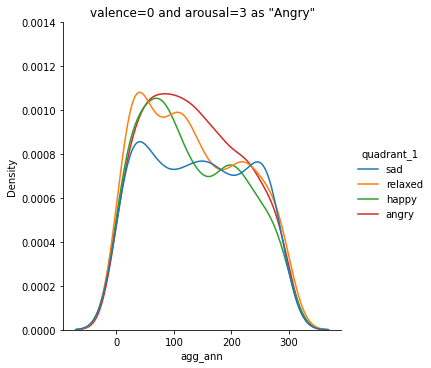

In [15]:
sns.displot(df, x="agg_ann", hue="quadrant_1", kind="kde", fill=False).set(title='valence=0 and arousal=3 as "Angry"')
plt.ylim(0, 0.0014)

### Before

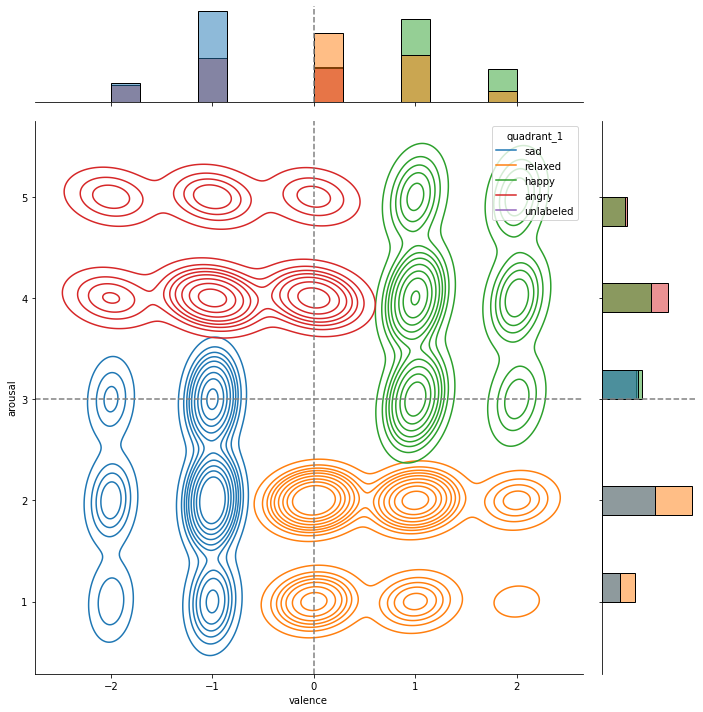

In [11]:
g = sns.JointGrid(data=df, x="valence", y="arousal", hue="quadrant_1", size=10, hue_order=["sad", "relaxed", "happy", "angry", "unlabeled"])
g.plot(sns.kdeplot, sns.histplot)
g.refline(x=0, y=3)

### After

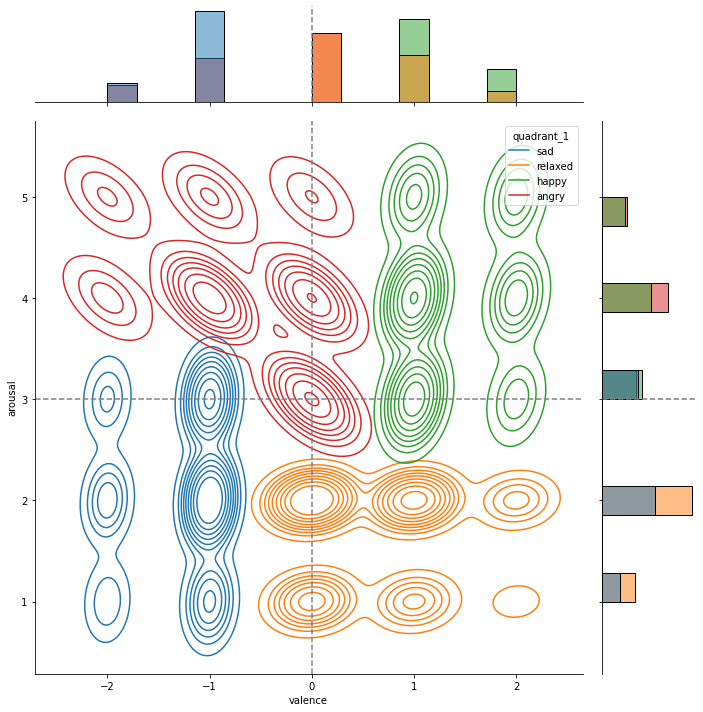

In [16]:
g = sns.JointGrid(data=df, x="valence", y="arousal", hue="quadrant_1", size=10)
g.plot(sns.kdeplot, sns.histplot)
g.refline(x=0, y=3)

## Happy

In [17]:
df[f"quadrant_2"].loc[(df["valence"] == 0) & (df["arousal"] == 3)] = "happy"
df["quadrant_2"].value_counts()

happy      826
relaxed    692
sad        604
angry      516
Name: quadrant_2, dtype: int64

(0.0, 0.0014)

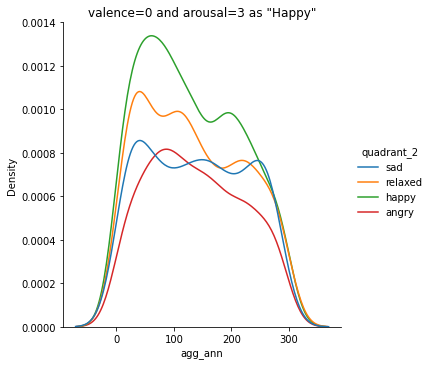

In [18]:
sns.displot(df, x="agg_ann", hue="quadrant_2", kind="kde").set(title='valence=0 and arousal=3 as "Happy"')
plt.ylim(0, 0.0014)

## Sad

In [19]:
df[f"quadrant_3"].loc[(df["valence"] == 0) & (df["arousal"] == 3)] = "sad"
df["quadrant_3"].value_counts()

sad        795
relaxed    692
happy      635
angry      516
Name: quadrant_3, dtype: int64

(0.0, 0.0014)

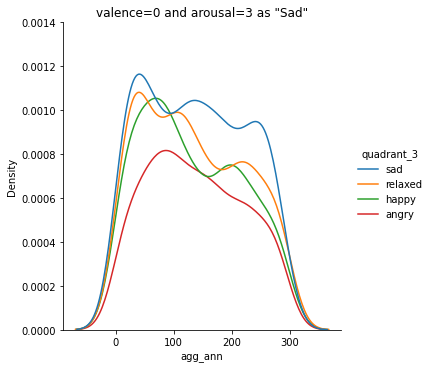

In [20]:
sns.displot(df, x="agg_ann", hue="quadrant_3", kind="kde").set(title='valence=0 and arousal=3 as "Sad"')
plt.ylim(0, 0.0014)

## Relaxed

In [21]:
df[f"quadrant_4"].loc[(df["valence"] == 0) & (df["arousal"] == 3)] = "relaxed"
df["quadrant_4"].value_counts()

relaxed    883
happy      635
sad        604
angry      516
Name: quadrant_4, dtype: int64

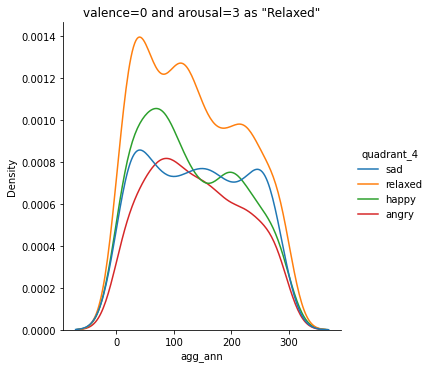

In [22]:
sns.displot(df, x="agg_ann", hue="quadrant_4", kind="kde").set(title='valence=0 and arousal=3 as "Relaxed"')

# Further observation

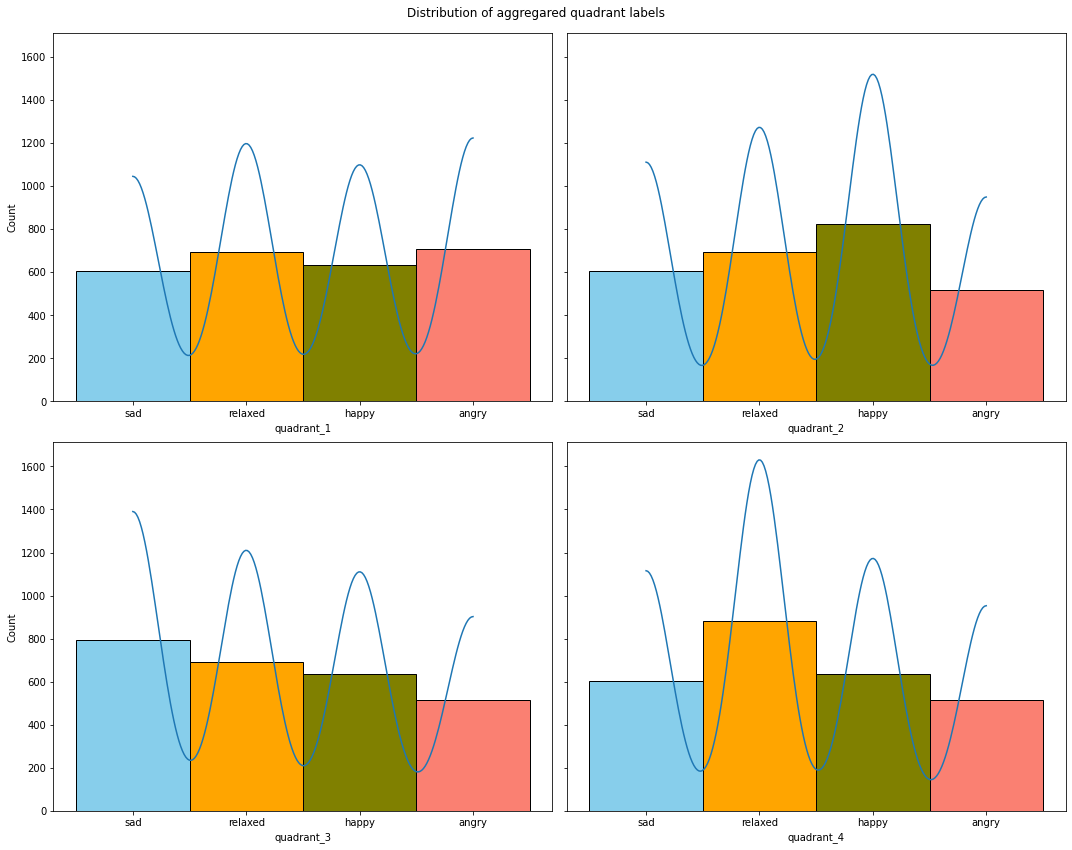

In [23]:
# select the columns to be plotted
cols = ['quadrant_1', 'quadrant_2', 'quadrant_3', 'quadrant_4']

# create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15,12), sharey=True)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, legend=True, stat='count', ax=ax)
    ax.patches[0].set_facecolor('skyblue')
    ax.patches[1].set_facecolor('orange')
    ax.patches[2].set_facecolor('olive')
    ax.patches[3].set_facecolor('salmon')

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle("Distribution of aggregared quadrant labels")
plt.show()

# Outlier?

In [24]:
df[['agg_ann', 'pianist_id', 'segment_id', 'annotator_id', 'quadrant_1', 'quadrant_2', 'quadrant_3', 'quadrant_4']].loc[df["agg_ann"] == 4]

,agg_ann,pianist_id,segment_id,annotator_id,quadrant_1,quadrant_2,quadrant_3,quadrant_4
2196,4,10,7,99,angry,angry,angry,angry
2197,4,10,7,137,angry,happy,sad,relaxed
2198,4,10,7,4,relaxed,relaxed,relaxed,relaxed
2199,4,10,7,168,happy,happy,happy,happy
2200,4,10,7,192,relaxed,relaxed,relaxed,relaxed
2201,4,10,7,98,happy,happy,happy,happy
2202,4,10,7,35,angry,happy,sad,relaxed
2203,4,10,7,113,angry,happy,sad,relaxed
2204,4,10,7,171,happy,happy,happy,happy
2205,4,10,7,115,angry,happy,sad,relaxed


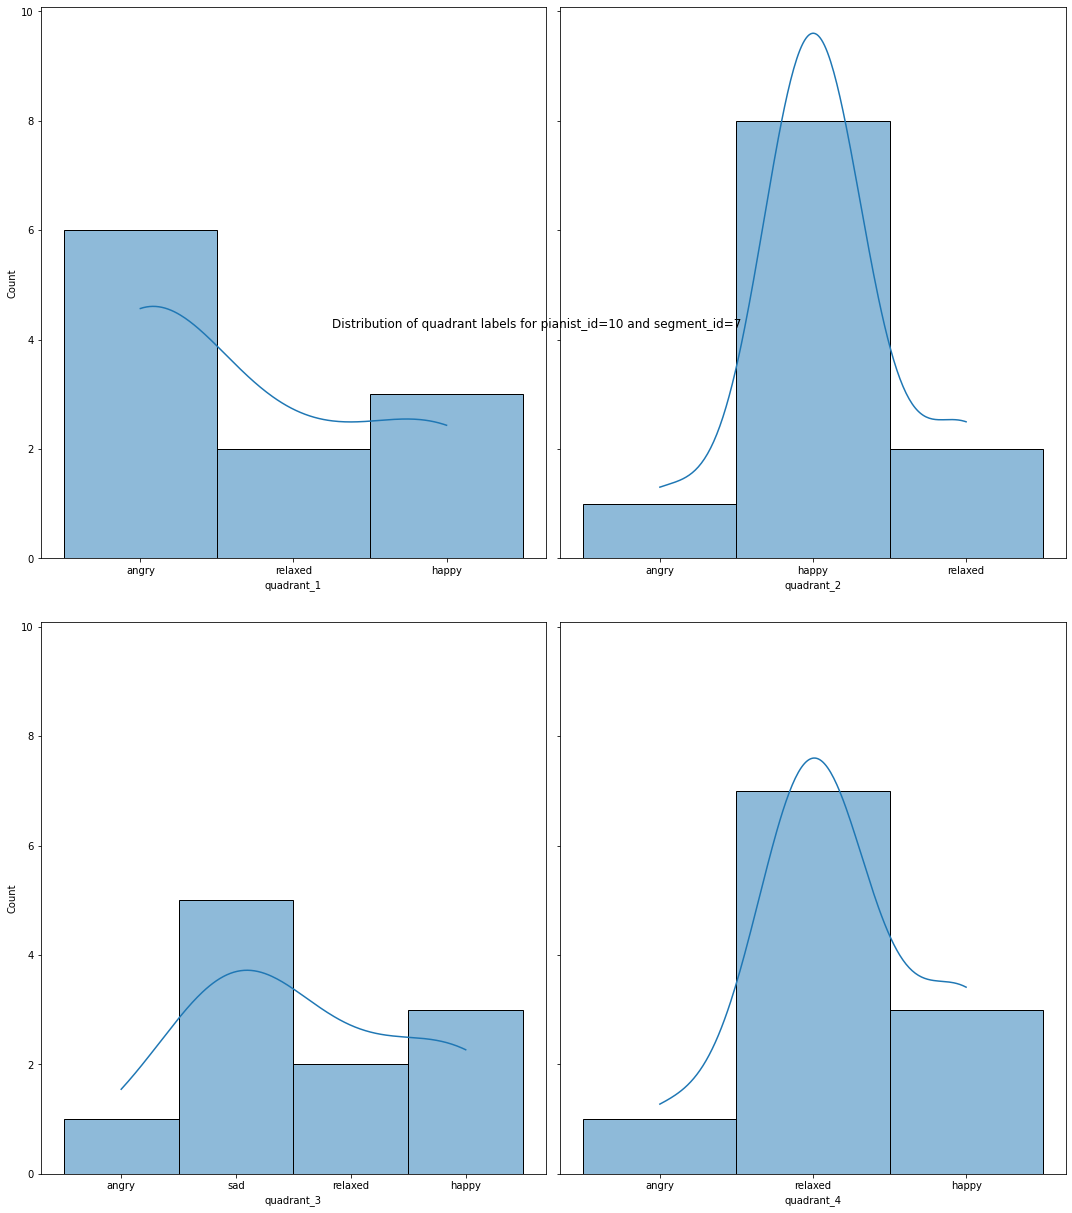

In [25]:
# select the columns to be plotted
cols = ['quadrant_1', 'quadrant_2', 'quadrant_3', 'quadrant_4']

# create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15,12), sharey=True)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=df.loc[df["agg_ann"] == 4][col], kde=True, legend=True, stat='count', ax=ax)

fig.tight_layout()
fig.subplots_adjust(top=1.4)
fig.suptitle("Distribution of quadrant labels for pianist_id=10 and segment_id=7", y=1.04)
plt.show()

No handles with labels found to put in legend.


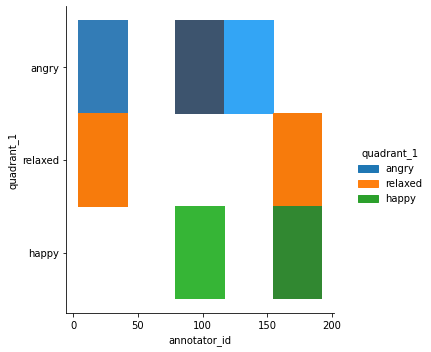

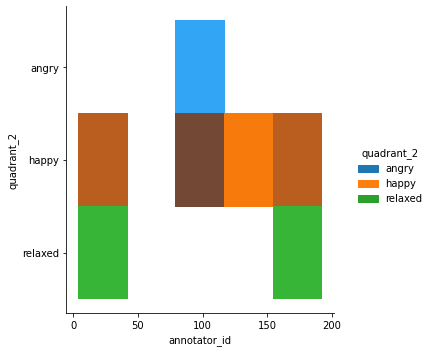

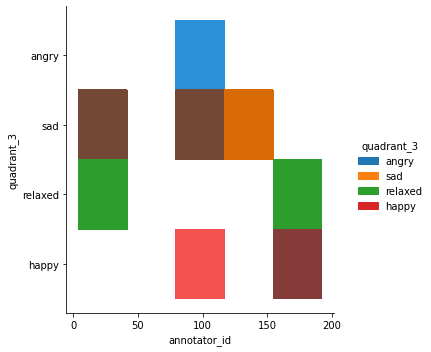

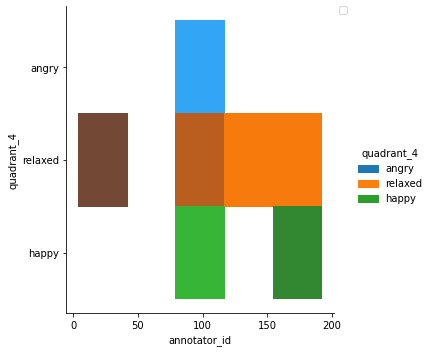

In [26]:
sns.displot(data=df.loc[df["agg_ann"] == 4], x="annotator_id", y="quadrant_1", hue="quadrant_1", legend="full")
sns.displot(data=df.loc[df["agg_ann"] == 4], x="annotator_id", y="quadrant_2", hue="quadrant_2", legend="full")
sns.displot(data=df.loc[df["agg_ann"] == 4], x="annotator_id", y="quadrant_3", hue="quadrant_3", legend="full")
sns.displot(data=df.loc[df["agg_ann"] == 4], x="annotator_id", y="quadrant_4", hue="quadrant_4", legend="full")
plt.rcParams["figure.autolayout"] = True
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

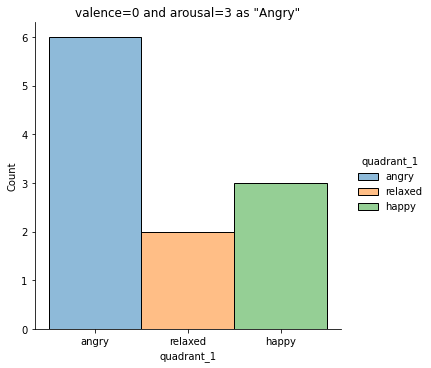

In [27]:
sns.displot(df.loc[df["agg_ann"] == 4], x="quadrant_1", kde=True, hue="quadrant_1", kind="hist").set(title='valence=0 and arousal=3 as "Angry"')

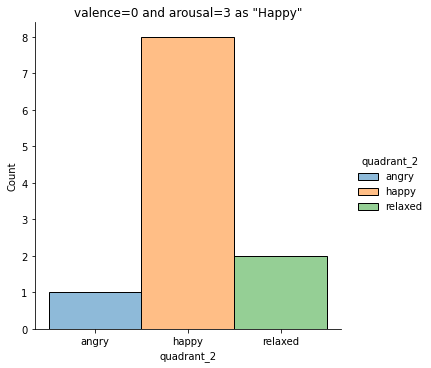

In [28]:
sns.displot(df.loc[df["agg_ann"] == 4], x="quadrant_2", kde=True, hue="quadrant_2", kind="hist").set(title='valence=0 and arousal=3 as "Happy"')

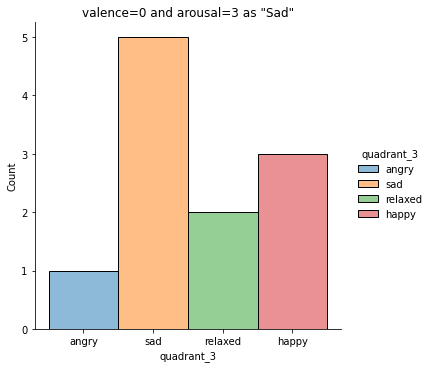

In [29]:
sns.displot(df.loc[df["agg_ann"] == 4], x="quadrant_3", kde=True, hue="quadrant_3", kind="hist").set(title='valence=0 and arousal=3 as "Sad"')

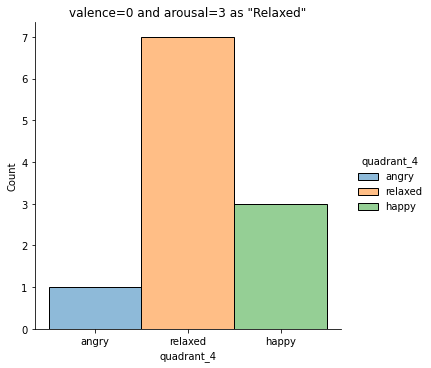

In [30]:
sns.displot(df.loc[df["agg_ann"] == 4], x="quadrant_4", kde=True, hue="quadrant_4", kind="hist").set(title='valence=0 and arousal=3 as "Relaxed"')

# Features

In [31]:
dfeat

,pianist_id,segment_id,snippet_id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,...,mirtoolbox_novelty_std,mirtoolbox_novelty_pct_10,mirtoolbox_novelty_pct_50,mirtoolbox_novelty_pct_90,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std,mirtoolbox_roughness_pct_10,mirtoolbox_roughness_pct_50,mirtoolbox_roughness_pct_90
0,1,0,0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,...,0.106446,0.00000,0.013819,0.082176,0.169743,0.011449,0.004161,0.006684,0.011048,0.017025
1,1,0,1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,...,0.193342,0.00000,0.027786,0.356029,0.355861,0.006205,0.003194,0.002583,0.005657,0.010610
2,1,0,2,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,...,0.218179,0.00000,0.049050,0.375251,0.209162,0.007467,0.003986,0.002330,0.007206,0.012690
3,1,0,3,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,...,0.118148,0.00002,0.017653,0.098657,0.232454,0.007335,0.004063,0.002609,0.006807,0.012971
4,1,0,4,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,...,0.121018,0.00000,0.020525,0.157408,0.140930,0.007345,0.003917,0.002662,0.007016,0.012731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,11,26,2,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,...,0.203668,0.00000,0.052074,0.377220,0.269012,0.014044,0.004991,0.007948,0.013532,0.020522
2278,11,26,3,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,...,0.161435,0.00000,0.029478,0.251830,0.353269,0.011126,0.004529,0.005563,0.011076,0.016763
2279,11,26,4,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,...,0.130765,0.00000,0.025099,0.151084,0.319188,0.009205,0.004808,0.004193,0.008083,0.016254
2280,11,26,5,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,...,0.247554,0.00000,0.084562,0.600001,0.133573,0.013538,0.004881,0.007919,0.012861,0.019997


In [32]:
# aggregate annotations into labels
agg_ann2 = dfeat[["pianist_id", "segment_id", "snippet_id"]].value_counts().index
agg_ann2

MultiIndex([( 1,  0,  0),
            ( 8,  7,  1),
            ( 8,  6, 10),
            ( 8,  6, 11),
            ( 8,  6, 12),
            ( 8,  6, 13),
            ( 8,  6, 14),
            ( 8,  7,  0),
            ( 8,  7,  2),
            ( 8,  6,  8),
            ...
            ( 4, 15,  8),
            ( 4, 15,  7),
            ( 4, 15,  6),
            ( 4, 15,  5),
            ( 4, 15,  4),
            ( 4, 15,  3),
            ( 4, 15,  2),
            ( 4, 15,  1),
            ( 4, 15,  0),
            (11, 26,  6)],
           names=['pianist_id', 'segment_id', 'snippet_id'], length=2282)

In [33]:
ann = 0
dfeat["agg_ann"] = ""

for i in agg_ann2:
    ann += 1
    dfeat["agg_ann"].loc[(dfeat["pianist_id"] == i[0]) & (dfeat["segment_id"] == i[1]) & (dfeat["snippet_id"] == i[2])] = ann

dfeat[["agg_ann", "pianist_id", "segment_id", "snippet_id"]]

,agg_ann,pianist_id,segment_id,snippet_id
0,1,1,0,0
1,572,1,0,1
2,1521,1,0,2
3,1522,1,0,3
4,1523,1,0,4
...,...,...,...,...
2277,763,11,26,2
2278,764,11,26,3
2279,765,11,26,4
2280,766,11,26,5


In [34]:
dfeat["agg_ann"].value_counts()

1       1
2       1
3       1
4       1
5       1
       ..
2278    1
2279    1
2280    1
2281    1
2282    1
Name: agg_ann, Length: 2282, dtype: int64

In [35]:
print(dfeat.columns)

Index(['pianist_id', 'segment_id', 'snippet_id', 'essentia_dissonance_mean',
       'essentia_dissonance_stdev', 'essentia_dynamic_complexity',
       'essentia_loudness', 'essentia_onset_rate',
       'essentia_pitch_salience_mean', 'essentia_pitch_salience_stdev',
       ...
       'mirtoolbox_novelty_pct_10', 'mirtoolbox_novelty_pct_50',
       'mirtoolbox_novelty_pct_90', 'mirtoolbox_pulseclarity',
       'mirtoolbox_roughness_mean', 'mirtoolbox_roughness_std',
       'mirtoolbox_roughness_pct_10', 'mirtoolbox_roughness_pct_50',
       'mirtoolbox_roughness_pct_90', 'agg_ann'],
      dtype='object', length=173)


In [36]:
dfeat2 = dfeat
dfeat2 = dfeat2.drop(['pianist_id', 'segment_id', 'snippet_id'], inplace=True, axis=1)

In [37]:
dfeat2